<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list4_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### リスト 4.10 データの準備

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)

x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

### リスト 4.12 指定した個所にコードを追記

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

In [7]:
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---

In [8]:
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 activation_3 (Activation)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
 activation_4 (Activation)   (None, 3)                 0         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable 

### リスト 4.13 構築したモデルを訓練

In [10]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0136 - accuracy: 0.5179
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9537 - accuracy: 0.6875
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.6875
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.6964
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.7054
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.7411
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.7500
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.7589
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7679
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7946
Epoch 11/30
14/14 [

### リスト 4.14 学習の推移

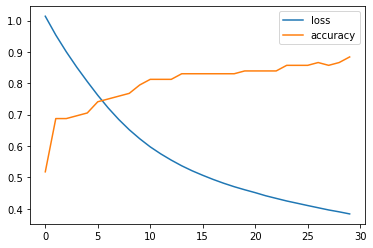

In [11]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()